In [4]:
import pandas as pd
from fit import gee
from IPython.display import Markdown as md, display

# Preberi podatke


In [5]:
df=pd.read_csv('./data/article.csv')
df.loc[df['gender'] == 'Man', ['gender']] = 'moški'
df.loc[df['gender'] == 'Woman', ['gender']] = 'ženska'
df.loc[df['bmi_baseline_cat'] == 'Normal', ['bmi_baseline_cat']] = 'normalen'
df.loc[df['bmi_baseline_cat'] == 'Overweight', ['bmi_baseline_cat']] = 'debel'
df.loc[df['bmi_baseline_cat'] == 'Obese', ['bmi_baseline_cat']] = 'predebel'

# GEE model
Uporaba dvokomponentnega cosinor. Prikaz intervalov zaupanja za ocenjene parametre ritma in povzetek naučenega modela.

                               GEE Regression Results                              
Dep. Variable:                         hrv   No. Observations:                 8751
Model:                                 GEE   No. clusters:                      113
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                 588
Family:                           Gaussian   Mean cluster size:                77.4
Dependence structure:         Exchangeable   Num. iterations:                     9
Date:                     Wed, 14 Feb 2024   Scale:                         669.114
Covariance type:                    robust   Time:                         09:42:33
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercep

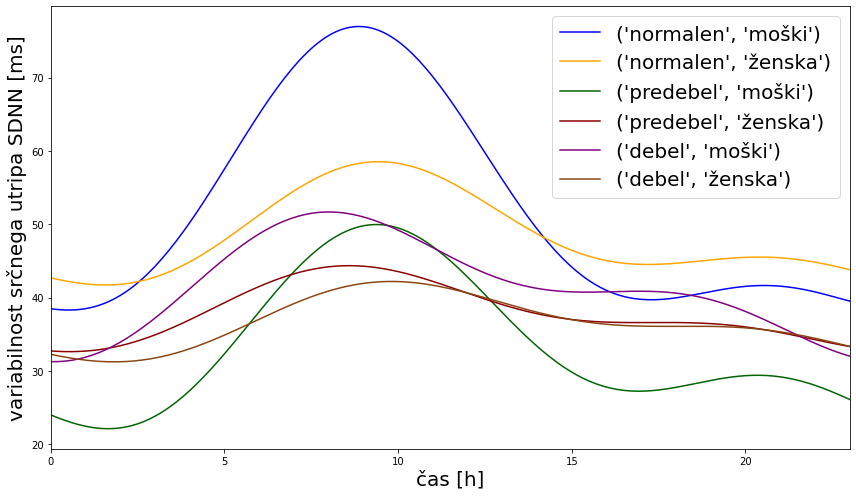

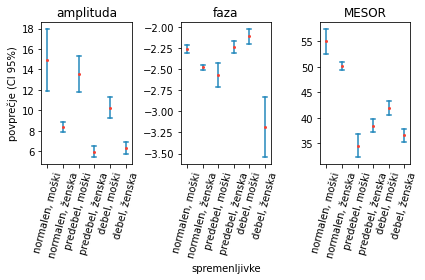

,amplitude,acrophase,mesor,locs,heights,parameter
0,19.33,-2.332347,57.63,[8.91],[76.95],"(normalen, moški)"
1,8.41,-2.463378,50.12,"[9.41, 20.42]","[58.53, 45.52]","(normalen, ženska)"
2,13.92,-2.463378,36.04,[9.41],[49.95],"(predebel, moški)"
3,5.86,-2.253728,38.49,"[8.61, 17.72]","[44.35, 36.6]","(predebel, ženska)"
4,10.21,-2.096492,41.47,"[8.01, 16.92]","[51.67, 40.86]","(debel, moški)"
5,5.48,-2.568202,36.72,"[9.81, 18.52]","[42.2, 36.09]","(debel, ženska)"


,parameter,amplitude,std_amplitude,amplitude_CIs,acrophase,std_acrophase,acrophase_CIs,mesor,std_mesor,mesor_CIs
0,"normalen, moški",14.92,6.96,"[1.28, 28.57]",-2.26,0.11,"[-2.48, -2.04]",54.96,5.62,"[43.95, 65.98]"
1,"normalen, ženska",8.36,1.14,"[6.12, 10.6]",-2.48,0.06,"[-2.6, -2.36]",50.16,1.57,"[47.08, 53.24]"
2,"predebel, moški",13.56,3.98,"[5.76, 21.36]",-2.57,0.32,"[-3.2, -1.93]",34.55,5.2,"[24.36, 44.74]"
3,"predebel, ženska",5.95,1.26,"[3.47, 8.42]",-2.24,0.16,"[-2.55, -1.93]",38.46,2.82,"[32.94, 43.98]"
4,"debel, moški",10.26,2.35,"[5.65, 14.86]",-2.11,0.2,"[-2.51, -1.71]",41.91,3.06,"[35.91, 47.92]"
5,"debel, ženska",6.31,1.44,"[3.5, 9.13]",-3.19,0.81,"[-4.78, -1.6]",36.62,2.89,"[30.96, 42.29]"


In [6]:
df1=gee.gee_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', interactions=['bmi_baseline_cat', 'gender'],n_components=2,save_to='./results/demo/gee_example.png',summary=True)
df2=gee.calculate_confidence_intervals_parameters_cosinor(df, 'hrv', 'Hour_of_Day', 'participant_id', interactions=['bmi_baseline_cat', 'gender'],n_components=2,save_to='./results/demo/gee_example_ci.png')
display(df1)
display(df2)